In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 5]

In [8]:
df = pd.read_csv("/kaggle/input/mobile-price-prediction/Cellphone.csv")

In [9]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [10]:
df.shape

(161, 14)

Removing unecessory columns from dataframe.

In [11]:
df = df.drop(["Product_id"], axis=1)

checking the null values in the columns

In [6]:
df.isna().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

standerdize all the data except the price

In [7]:
def standerdize(x):
    return (x - x.mean())/x.std()

In [8]:
standerdize_Dataframe = pd.DataFrame()

In [9]:
for c in df.columns[1:]:
    standerdize_Dataframe[c] = standerdize(df[c])

In [10]:
standerdize_Dataframe["Price"] = df["Price"]

In [11]:
standerdize_Dataframe.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,-0.395357,-0.381382,-0.006582,0.659692,1.285940,-0.254813,-0.295150,0.493844,0.424121,0.805355,-0.169798,-0.694045,2357
1,-0.395357,-0.489038,-0.801308,-0.756942,-1.169036,-0.338176,-0.711747,-0.748522,-1.169322,-1.037091,-0.835493,0.446172,1749
2,-0.395357,-0.650522,-0.337718,-0.171004,-0.350711,-0.504903,-0.572881,-0.437930,0.424121,0.114438,-0.616033,-0.602828,1916
3,-0.394710,-0.559015,-0.801308,-0.756942,-1.169036,-0.338176,-0.711747,-1.051659,-1.169322,-1.037091,-1.054954,0.947868,1315
4,-0.394710,-0.489038,-0.801308,-0.756942,-1.169036,-0.338176,-0.711747,-0.748522,-1.169322,-1.037091,-0.835493,0.446172,1749


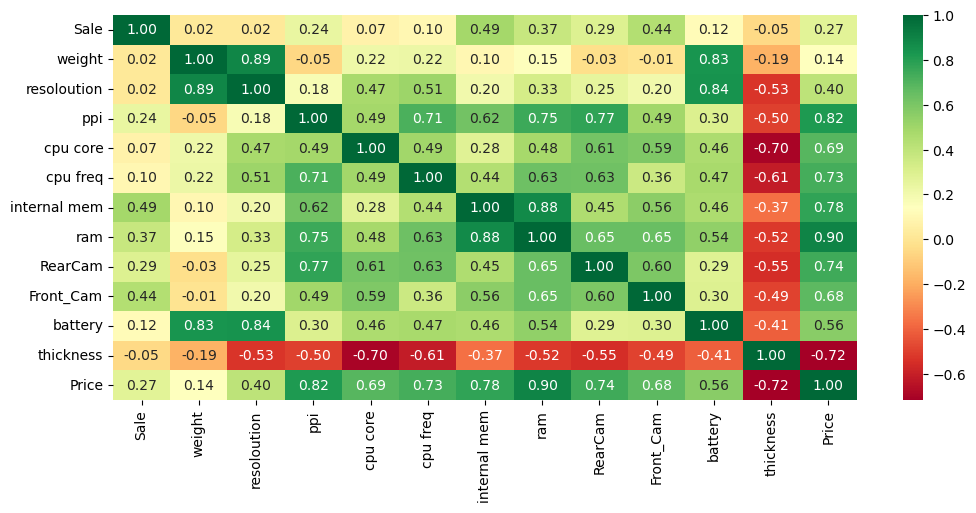

In [12]:
_ = sns.heatmap(standerdize_Dataframe.corr(),cmap='RdYlGn',fmt = ".2f", annot=True)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components = 5)

In [15]:
pca_model = pca.fit(standerdize_Dataframe[standerdize_Dataframe.columns[:-1]])

In [16]:
X = pca_model.transform(standerdize_Dataframe[standerdize_Dataframe.columns[:-1]])

# Model training

In [17]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(X,df.Price, test_size=0.2, random_state = 13223, shuffle=True)

In [18]:
model_RMSE = {}

RMSE = sqrt(1/n * sum((y_pred - y_actual)^2))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr_model = lr.fit(train_x,train_y)
pred = lr_model.predict(test_x)
model_RMSE["Linear Regression"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Linear Regression"]))

Root Mean Square Error: 182.78


Y = β0 + β1X(cofficents)(value to be predicted)

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=6, random_state = 34)
rf_model = rf.fit(train_x, train_y)
pred = rf.predict(test_x)
model_RMSE["Random Forest"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Random Forest"]))

Root Mean Square Error: 142.20


In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
knn_model = knn.fit(train_x, train_y)
pred = knn_model.predict(test_x)
model_RMSE["K Nearest"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["K Nearest"]))

Root Mean Square Error: 244.85


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.3,random_state = 124124)
gb_model = gb.fit(train_x, train_y)
pred = gb_model.predict(test_x)
model_RMSE["Gradient Boosting"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Gradient Boosting"]))

Root Mean Square Error: 134.99


Root Mean Square Propagation

In [24]:
def MeanRegressor(models, weights, X):
    m_p = [0]*len(X)
    inverse_weights = np.ones(len(weights))/weights
    newWeights = inverse_weights / inverse_weights.sum()
    

    for m,w in zip(models, newWeights):
        m_p += m.predict(X).reshape(len(X))*w
        
    return m_p/1
    

In [25]:
pred = MeanRegressor([lr_model,rf_model, knn_model, gb_model, model],list(model_RMSE.values()),test_x)
model_RMSE["Mean Model"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Mean Model"]))

2/2 [==============================] - 0s 4ms/step

Root Mean Square Error: 146.18


NameError: name 'model_RMSE' is not defined

# Prediction